# Detecting Insults in Social Commentary

## 1. Business Understanding

### 1.1 Project description

Analyzing data and detecting if a sentence contains insults, profanity, racial slurs, or any offensive words and building a model to recognize whether these comments containing curse words are directed towards people in the same community/forum and not towards celebrities & public figures.

### 1.2 Project objectives

- Detect whether comments in my dataset contain insults or not
- Analyze and visualize the data
- Differentiate between comments containing profanity targeted toward other users and ones targeted toward celebrities & public figures

## 2. Data Understanding

### 2.1. Importing the data

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
from sklearn.feature_extraction.text import CountVectorizer

# Download NLTK data
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset
data = pd.read_csv(r"C:\Users\moham\OneDrive\Desktop\Insults_Data\train.csv")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 2.2. Data exploration

In [25]:
data.head(20)

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."
5,0,20120620171226Z,"""@SDL OK, but I would hope they'd sign him to ..."
6,0,20120503012628Z,"""Yeah and where are you now?"""
7,1,NaN,"""shut the fuck up. you and the rest of your fa..."
8,1,20120502173553Z,"""Either you are fake or extremely stupid...may..."
9,1,20120620160512Z,"""That you are an idiot who understands neither..."


### 2.2.1 Columns description

- Insults: It can be either 1 or 0 (Some of these comments are not accurately marked. eg: 44)
    0: No insult detected in the comment
    1: Insult detected in the comment
- Date: The date the comment was made --> iN THE FORMAT "YYYYMMDDhhmmssZ"
- Comment: The sentence itself which may or may not contain insults

## 3. Data preparation and pre-processing

### 3.1. Data cleaning

In [26]:
## Function for text cleaning
def clean_text(text):
    # Remove special characters, numbers, and newline characters, but keep commas, exclamation marks, question marks, and spaces
    text = re.sub(r'[^A-Za-z\s,!?@]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove extra spaces between words
    text = ' '.join(text.split())
    return text

# Handling missing data in the "Date" column and cleaning the "Comment" column
data = data.dropna(subset=['Date'])
data['Comment'] = data['Comment'].apply(clean_text)

data.head(20)

,Insult,Date,Comment
0,1,20120618192155Z,you fuck your dad
1,0,20120528192215Z,i really dont understand your pointxa it seems...
4,0,20120619094753Z,cxec buean xuuedng uubueddng biuecu txecnh cxf...
5,0,20120620171226Z,"@sdl ok, but i would hope theyd sign him to a ..."
6,0,20120503012628Z,yeah and where are you now?
8,1,20120502173553Z,either you are fake or extremely stupidmaybe both
9,1,20120620160512Z,that you are an idiot who understands neither ...
10,0,20120620015140Z,@jdstorm dont wish him injury but it happened ...
11,0,20120530044519Z,"be careful,jimboog has a fork with your name o..."
15,1,20120611090207Z,for some reason u sound retarded lol damn wher...


### 3.2. Data visualization

In [27]:
# Function for lemmatization
def lemmatize_text(text):
    # Tokenize text
    words = text.split()
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return lemmatized_words

# Apply lemmatization to the 'Comment' column
data['Lemmatized_Comment'] = data['Comment'].apply(lemmatize_text)

# Combine lemmatized words from all comments into a single list
lemmatized_words = [word for words in data['Lemmatized_Comment'] for word in words]

# Count word frequencies
word_counts = Counter(lemmatized_words)

# Define a list of curse words (replace with real curse words)
curse_words = ['fuck', 'fucking', 'fucked', 'fucker', 'shitty', 'shit', 'shite', 'retard', 'retarded', 'bitch', 'whore', 'bastard',
               'faggot', 'douche', 'fag', 'scum', 'idiot', 'stupid', 'dumbass', 'douchebag', 'hoe', 'asshole', 'cunt', 'dickhead']

# Initialize a dictionary to store curse words and their frequencies
curse_word_frequencies = {}

# Find and count curse words in lemmatized words
for word in curse_words:
    curse_word_frequencies[word] = word_counts[word]

# Print curse words and their frequencies
for word, count in curse_word_frequencies.items():
    print(f'{word}: {count}')

fuck: 209
fucking: 154
fucked: 24
fucker: 15
shitty: 7
shit: 120
shite: 1
retard: 19
retarded: 12
bitch: 78
whore: 19
bastard: 10
faggot: 15
douche: 4
fag: 4
scum: 10
idiot: 124
stupid: 102
dumbass: 9
douchebag: 3
hoe: 5
asshole: 10
cunt: 5
dickhead: 5


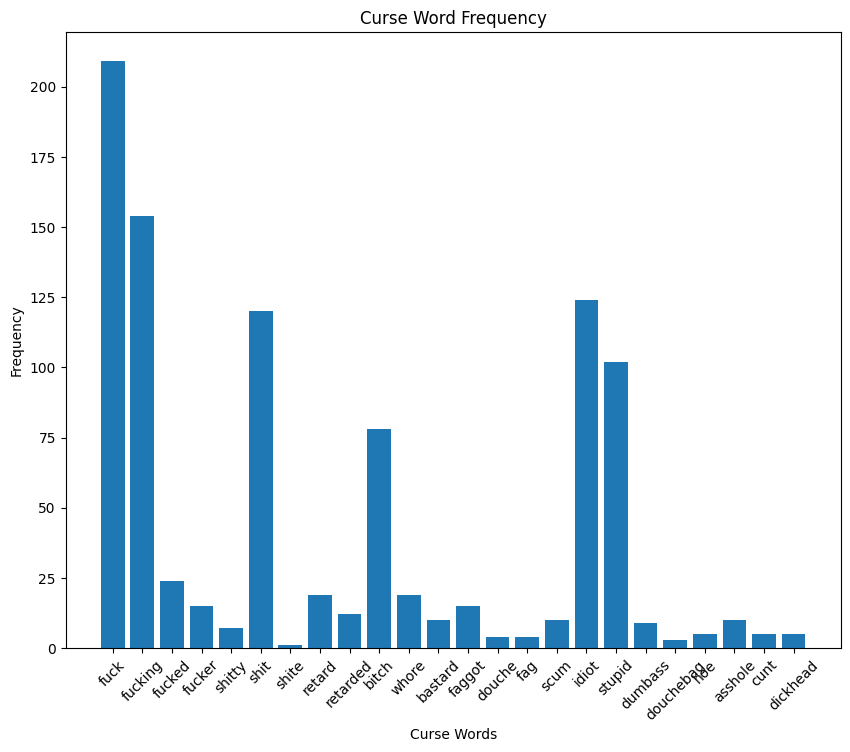

In [28]:
# Create a bar chart to show curse word frequencies
plt.figure(figsize=(10, 8))
plt.bar(curse_word_frequencies.keys(), curse_word_frequencies.values())
plt.xlabel("Curse Words")
plt.ylabel("Frequency")
plt.title("Curse Word Frequency")
plt.xticks(rotation=45)
plt.show()

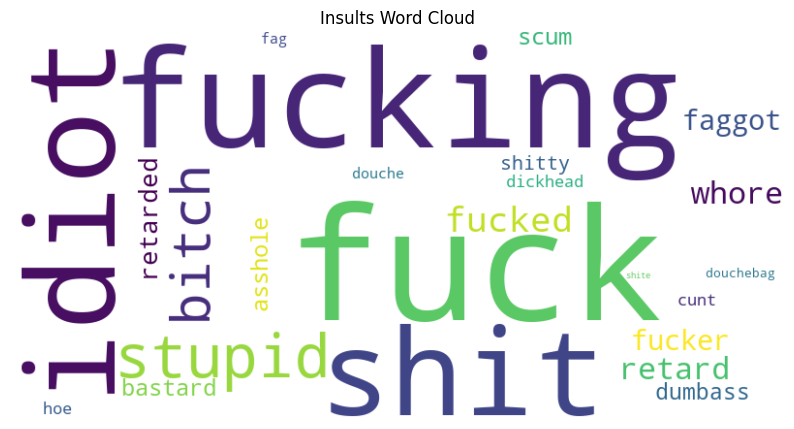

In [29]:
# Create a word cloud of curse words
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(curse_word_frequencies)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Insults Word Cloud")
plt.show()

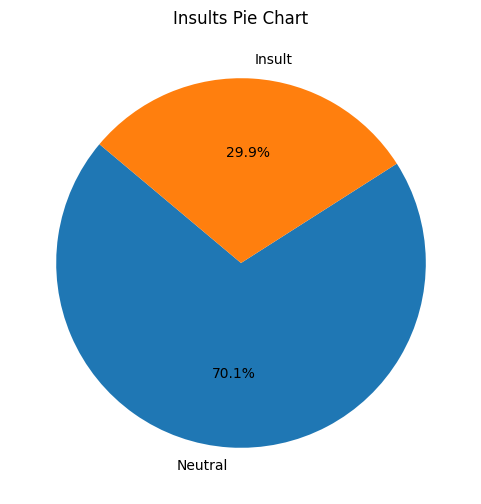

In [30]:
# Assuming you have a DataFrame with an 'Insult' column
insult_counts = data['Insult'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(insult_counts, labels=['Neutral', 'Insult'], autopct='%1.1f%%', startangle=140)
plt.title('Insults Pie Chart')
plt.show()

In [21]:
from textblob import TextBlob  # For sentiment analysis

# Feature 1: Word Count
data['Word_Count'] = data['Comment'].apply(lambda x: len(str(x).split()))

# Feature 2: Presence of Curse Words
def contains_curse_word(comment):
    for word in curse_words:
        if word in comment:
            return 1
    return 0

data['Contains_Curse_Word'] = data['Comment'].apply(contains_curse_word)

# Feature 3: Sentiment Analysis Scores (polarity and subjectivity)
data['Sentiment_Polarity'] = data['Comment'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
data['Sentiment_Subjectivity'] = data['Comment'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Display the first few rows of the modified dataset
data.head(20)


,Insult,Date,Comment,Lemmatized_Comment,Word_Count,Contains_Curse_Word,Sentiment_Polarity,Sentiment_Subjectivity
0,1,20120618192155Z,you fuck your dad,"[you, fuck, your, dad]",4,1,-0.400000,0.600000
1,0,20120528192215Z,i really dont understand your pointxa it seems...,"[i, really, dont, understand, your, pointxa, i...",15,0,0.200000,0.200000
4,0,20120619094753Z,cxec buean xuuedng uubueddng biuecu txecnh cxf...,"[cxec, buean, xuuedng, uubueddng, biuecu, txec...",77,0,0.000000,0.000000
5,0,20120620171226Z,"@sdl ok, but i would hope theyd sign him to a ...","[@sdl, ok,, but, i, would, hope, theyd, sign, ...",48,0,0.200000,0.233333
6,0,20120503012628Z,yeah and where are you now?,"[yeah, and, where, are, you, now?]",6,0,0.000000,0.000000
8,1,20120502173553Z,either you are fake or extremely stupidmaybe both,"[either, you, are, fake, or, extremely, stupid...",8,1,-0.312500,1.000000
9,1,20120620160512Z,that you are an idiot who understands neither ...,"[that, you, are, an, idiot, who, understands, ...",12,1,-0.800000,0.800000
10,0,20120620015140Z,@jdstorm dont wish him injury but it happened ...,"[@jdstorm, dont, wish, him, injury, but, it, h...",21,0,0.600000,1.000000
11,0,20120530044519Z,"be careful,jimboog has a fork with your name o...","[be, careful,jimboog, ha, a, fork, with, your,...",10,0,0.000000,0.000000
15,1,20120611090207Z,for some reason u sound retarded lol damn wher...,"[for, some, reason, u, sound, retarded, lol, d...",12,1,0.133333,0.633333


### 3.3 Data reduction

### 3.4 Data transformation

### 3.4. Feature selection

## 4. Modeling

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you already have the 'data' DataFrame with features and target variable 'Insult'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Comment'], data['Insult'], test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train_tfidf, y_train)

# Make predictions on the testing set
y_pred = logreg_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.80

Confusion Matrix:
[[438  13]
 [115  80]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       451
           1       0.86      0.41      0.56       195

    accuracy                           0.80       646
   macro avg       0.83      0.69      0.71       646
weighted avg       0.81      0.80      0.78       646



In [36]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Comment'], data['Insult'], test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_tfidf, y_train)

# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Display evaluation metrics for Random Forest
print("\nRandom Forest:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(class_report_rf)



Random Forest:
Accuracy: 0.81

Confusion Matrix:
[[420  31]
 [ 91 104]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       451
           1       0.77      0.53      0.63       195

    accuracy                           0.81       646
   macro avg       0.80      0.73      0.75       646
weighted avg       0.81      0.81      0.80       646



In [37]:
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Comment'], data['Insult'], test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_tfidf, y_train)

# Make predictions on the testing set
y_pred_dt = dt_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

# Display evaluation metrics for Decision Tree
print("\nDecision Tree:")
print(f"Accuracy: {accuracy_dt:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_dt)
print("\nClassification Report:")
print(class_report_dt)



Decision Tree:
Accuracy: 0.75

Confusion Matrix:
[[379  72]
 [ 89 106]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       451
           1       0.60      0.54      0.57       195

    accuracy                           0.75       646
   macro avg       0.70      0.69      0.70       646
weighted avg       0.75      0.75      0.75       646



## 5. Evaluation

## 6. Insights, Conclusions and Business recommendations

## 7. Deployment